In [16]:
%matplotlib inline
import librosa, librosa.display, numpy, scipy.signal, matplotlib.pyplot as plt, IPython.display as ipd

# THX Logo Theme

THX posted the score of the original logo theme on Twitter.

Twitter: https://twitter.com/THX/status/1000077588415447040

YouTube: https://www.youtube.com/watch?v=6grjzBmHVTY

Following the instructions in the score, here is my version of the THX logo theme. It may not be exactly the same, but it comes close.

In [17]:
f_sustain = [450*x for x in [1/8, 1/6, 1/4, 1/3, 1/2, 2/3, 1, 4/3, 2, 8/3, 4, 16/3]] * 1
num_voices = len(f_sustain)

In [18]:
f = [200*2**numpy.random.rand() for _ in range(num_voices)]
f_middle = [200*2**numpy.random.rand() for _ in range(num_voices)]

For this notebook, I will *not* use a typical vector broadcasting method that is typical in NumPy or Matlab. Rather, I will address each sample one by one. This strategy can reduce space requirements and ensure continuity of the signal.

In [19]:
sr = 22050
t_incr = 1.0/sr

In [20]:
t_start = 4
t_middle = 10
t_sustain = 14
t_end = 16
N = t_end*sr

In [21]:
f_coef_start = [(f_middle[voice]/f[voice])**(t_incr/t_start) for voice in range(num_voices)]
f_coef_middle = [(f_sustain[voice]/f_middle[voice])**(t_incr/(t_middle-t_start)) for voice in range(num_voices)]

Amplitude coefficients.

In [22]:
A_coef_up = 10**(t_incr/100)
A_coef_down = 10**(-t_incr/100)

In [23]:
out_signal = numpy.zeros(N)
theta = [0] * num_voices
t = 0
A = 0.01

In [24]:
for n in range(1, N):
    
    for voice in range(num_voices):
        
        out_signal[n] += numpy.sin(2*numpy.pi*theta[voice])
        
        if t < t_start:
            f[voice] *= f_coef_start[voice]
            A *= A_coef_up
        elif t < t_middle:
            f[voice] *= f_coef_middle[voice]
            A *= A_coef_up
        elif t < t_sustain:
            pass
        else:
            A *= A_coef_down
            
        theta[voice] += f[voice]*t_incr

    t += t_incr
    out_signal[n] *= A

In [25]:
out_signal /= out_signal.max()

In [30]:
ipd.Audio(out_signal, rate=sr)

In [31]:
C = librosa.cqt(out_signal, sr=sr, fmin=10, n_bins=100, hop_length=256)

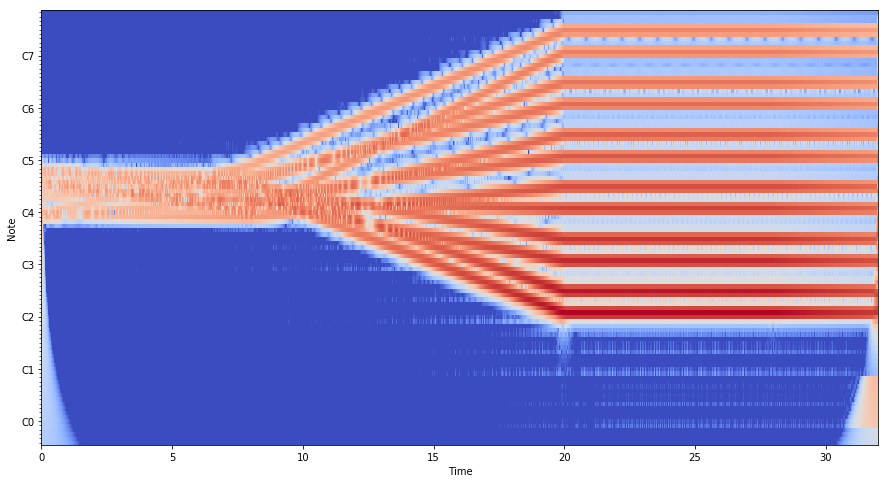

In [32]:
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 8))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=12, cmap='coolwarm')

### How does it compare to the original?

In [33]:
original, sr = librosa.load('audio/thx_original.mp3')

NoBackendError: 

In [34]:
ipd.Audio(original, rate=sr)

NameError: name 'original' is not defined

In [35]:
C = librosa.cqt(original, sr=sr, fmin=10, n_bins=100, hop_length=256)

NameError: name 'original' is not defined

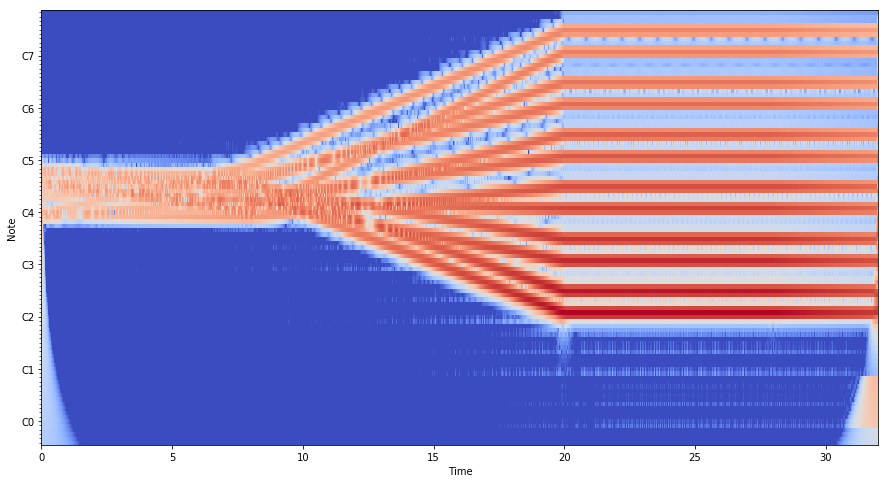

In [36]:
logC = librosa.amplitude_to_db(numpy.abs(C))
plt.figure(figsize=(15, 8))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=12, cmap='coolwarm')